In [4095]:
# path = "/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/karate_add_lambda_04_rho_08_step32_nobs200.jld2"
path = "/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/simulations/ER_add_lambda_175_rho_150_step16_nobs100_seed1.jld2"
;

In [4096]:
using Pkg
Pkg.activate("/home/fedflorio/master_thesis/")

  Activating project at `~/master_thesis`


In [4097]:
using MatrixProductBP, MatrixProductBP.Models
using JLD2, SparseArrays, PyPlot
include("/home/fedflorio/master_thesis/Utilities/roc.jl");

In [4098]:
D = load(path)

λ_true = D["λ"]

params_history = D["params_history"]
data = D["data"]

# params_history = D["data"]
# data = params_history[end]
;

In [4099]:
# data.λ
params_history[2].λ

30-element Vector{Vector{Float64}}:
 [0.01229472552384725, 0.01117704698623749, 0.010812819851723186, 0.01128811203391568, 0.011755807851290061, 0.011182183105928261, 0.010635714931442969, 0.011691928602615597, 0.010210789482142034]
 [0.014137828412319097, 0.018931597659705583, 0.019182021989215467]
 [1.0e-9]
 [0.011006531411133164, 0.011555326132504666, 0.009783672436078545, 0.011296989982455121, 0.010482047402984414, 0.01037755111877707, 0.00994937929778549, 0.010541976599782527, 0.010329133145142538, 0.010949889421238148]
 [0.010613287596344069, 0.01000134985062666, 0.01169406931451476, 0.01014401296952047, 0.010589564106881427, 0.011182767790648066, 0.010454112181413126, 0.010500315407367213, 0.01067643038006737, 0.011157200204730336]
 [0.018099754007128054, 0.011369935896122032, 0.01523362654852488, 0.013565851136311612]
 [0.017166029676855654, 0.01700363517080273, 0.015440581058066694]
 [0.025045604595264885]
 [0.014264412110629522, 0.015015998668665051, 0.012729593840053156, 0.0

In [4100]:
timept = 1
timept = length(params_history)

_data = [params_history[timept].λ[i][j] for i in eachindex(params_history[timept].λ) for j in eachindex(params_history[timept].λ[i])]
_history = [params_history[timept-1].λ[i][j] for i in eachindex(params_history[timept-1].λ) for j in eachindex(params_history[timept-1].λ[i])]

Δ = maximum((_data .- _history)./_data)
println("Δ($(timept)) = $(Δ)")

Δ(30) = 0.015448771367495586


auc = 0.7056213017751479


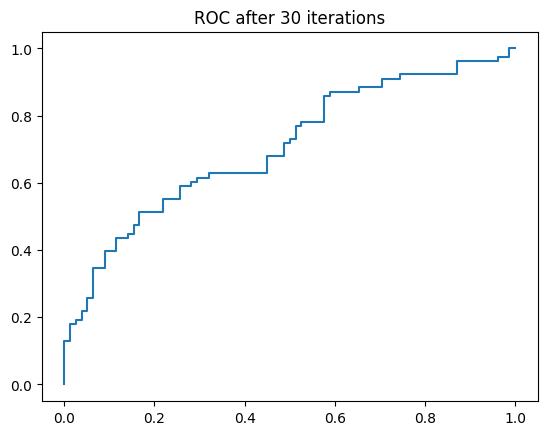

In [4101]:
neigs = load("/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/graphs/ER_add_neigs.jld2")["neigs"]

λ = params_history[timept].λ
λ = data.λ
xplot, yplot, area = roccurve_incomplete(deepcopy(λ), λ_true, neigs)
close("all")
plot(xplot,yplot)
title("ROC after $(length(params_history)) iterations")
println("auc = $area")

In [4102]:
auc_iterations = []
for p in params_history
    area = roccurve_incomplete(deepcopy(p.λ), λ_true, neigs)[3]
    push!(auc_iterations, area)
    println(area)
end

m = argmax(auc_iterations)
println("\nMax AUC for $(m) iterations\nAUC = $(auc_iterations[m])")

0.5920447074293228
0.6025641025641025
0.6106180144641683
0.618836291913215
0.6260683760683761
0.6324786324786325
0.6388888888888888
0.6451347797501643
0.6487508218277449
0.6517094017094017
0.6581196581196581
0.6622287968441815
0.6671597633136095
0.6701183431952663
0.6724194608809994
0.6755424063116371
0.678172255095332
0.6809664694280079
0.6844181459566075
0.6875410913872453
0.6903353057199211
0.6921433267587114
0.6947731755424064
0.69543063773833
0.6972386587771203
0.6974030243261012
0.6992110453648915
0.7000328731097962
0.7033201840894149
0.7056213017751479

Max AUC for 30 iterations
AUC = 0.7056213017751479
